In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
#DATASET_ENCODING = "ISO-8859-1"
#df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df = pd.read_csv('twitterdataset.csv',names=DATASET_COLUMNS, nrows=1048576, encoding='ISO-8859-1')

df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [4]:
df.tail(5)

,target,ids,date,flag,user,text
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048575,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [5]:
df.shape

(1048576, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [7]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [8]:
#check the number of null values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
#unique values in the column 'target'
allTargetValues = df['target'].unique()
print(allTargetValues)

[0 4]


In [10]:
dfGroupByTarget = df.groupby('target')
dfGroupByTarget #this is NOT a DATAFRAME 

In [11]:
df2 = dfGroupByTarget.count()
df2

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,248576,248576,248576,248576,248576


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

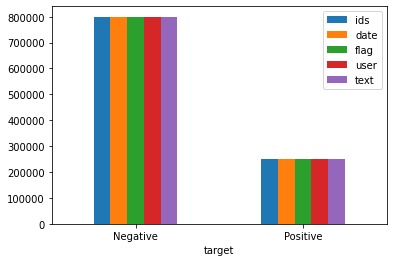

In [12]:
df2.plot(kind = 'bar').set_xticklabels(['Negative','Positive'], rotation=0)

In [13]:
text = list(df['text'])
sentiment = list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

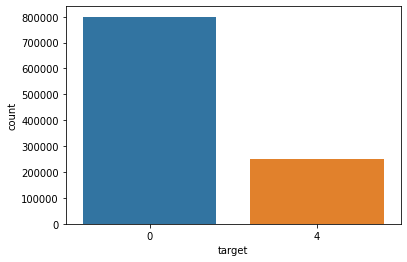

In [14]:
sns.countplot( data=df,x='target')


In [15]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [16]:
data = df[['text','target']]
data['target'].unique()



array([0, 4], dtype=int64)

In [17]:
#replacing the 4 into 1
data['target'] = data['target'].replace(4,1)

C:\Users\sandy\AppData\Local\Temp/ipykernel_33984/3950628673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [18]:
#seperating the positive and negative tweets

data_pos = data[data['target']==1]
data_neg = data[data['target']==0]
print(len(data_pos))
print(len(data_neg))

248576
800000


In [19]:
data_pos.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [20]:
#combine the positive & negative comments (text & target)
newdataset = pd.concat([data_neg,data_pos])

In [21]:
newdataset['text'] = newdataset['text'].str.lower()

In [22]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
newdataset['text'] = newdataset['text'].apply(lambda text: cleaning_stopwords(text))
newdataset['text'].tail()

1048571                            grandma making dinenr mum
1048572    mid-morning snack time... bowl cheese noodles....
1048573    @shadela say like terminiator movies. comes of...
1048574                @destinyhope92 im great thaanks wbuu?
1048575                           cant wait til date weekend
Name: text, dtype: object

In [24]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
newdataset['text']= newdataset['text'].apply(lambda x: cleaning_punctuations(x))
newdataset['text'].tail()

1048571                            grandma making dinenr mum
1048572        midmorning snack time bowl cheese noodles yum
1048573    shadela say like terminiator movies comes off ...
1048574                  destinyhope92 im great thaanks wbuu
1048575                           cant wait til date weekend
Name: text, dtype: object

In [25]:
#Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
newdataset['text'] = newdataset['text'].apply(lambda x: cleaning_repeating_char(x))
newdataset['text'].tail()

1048571                            grandma making dinenr mum
1048572        midmorning snack time bowl cheese noodles yum
1048573    shadela say like terminiator movies comes off ...
1048574                  destinyhope92 im great thaanks wbuu
1048575                           cant wait til date weekend
Name: text, dtype: object

In [26]:
#Cleaning and removing URL’s

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
newdataset['text'] = newdataset['text'].apply(lambda x: cleaning_URLs(x))
newdataset['text'].tail()

1048571                            grandma making dinenr mum
1048572        midmorning snack time bowl cheese noodles yum
1048573    shadela say like terminiator movies comes off ...
1048574                  destinyhope92 im great thaanks wbuu
1048575                           cant wait til date weekend
Name: text, dtype: object

In [27]:
#Cleaning and removing Numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
newdataset['text'] = newdataset['text'].apply(lambda x: cleaning_numbers(x))
newdataset['text'].tail()

1048571                            grandma making dinenr mum
1048572        midmorning snack time bowl cheese noodles yum
1048573    shadela say like terminiator movies comes off ...
1048574                    destinyhope im great thaanks wbuu
1048575                           cant wait til date weekend
Name: text, dtype: object

In [28]:
#Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'w+')
tokenizer = RegexpTokenizer('\s+', gaps = True)
newdataset['text'] = newdataset['text'].apply(tokenizer.tokenize)
newdataset['text'].head()

0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [29]:
#Applying Stemming

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
newdataset['text']= newdataset['text'].apply(lambda x: stemming_on_text(x))
newdataset['text'].head()

0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [30]:
#Applying Lemmatizer

nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
newdataset['text'] = newdataset['text'].apply(lambda x: lemmatizer_on_text(x))
newdataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sandy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [31]:
#Separating input feature and label

X=newdataset.text
y=newdataset.target

word cloud image


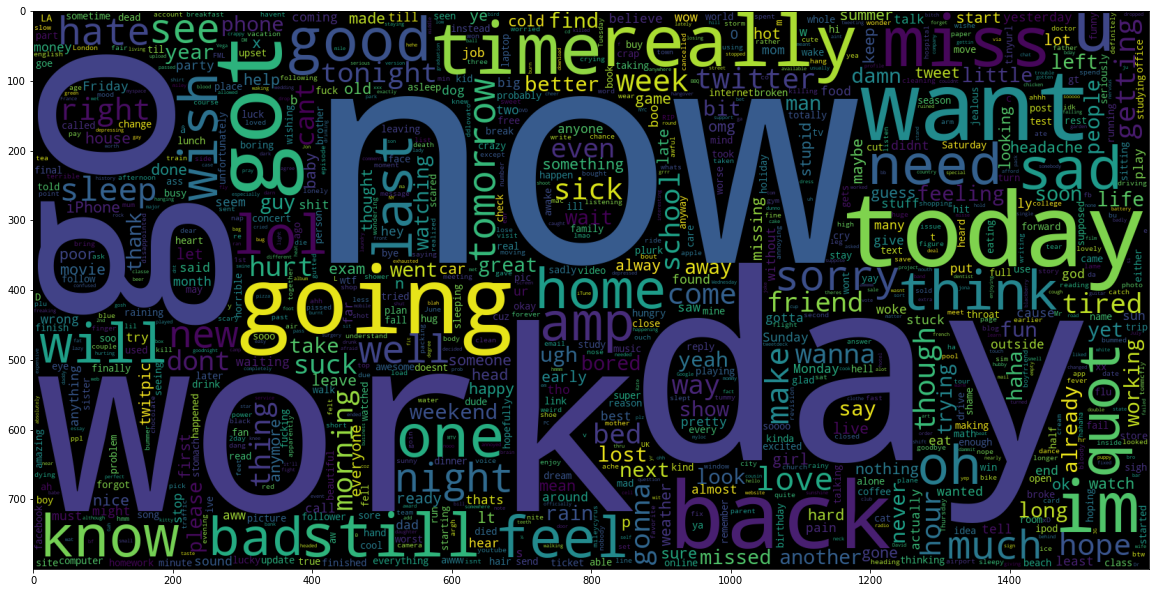

In [34]:
#Plot a cloud of words for negative tweets

data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

print("word cloud image")